In [1]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import shap 

# Read data
data = pd.read_csv('Health_Sleep_Statistics.csv')

# Data preprocessing
data['Physical Activity Level'] = data['Physical Activity Level'].map({'low': 1, 'medium': 2, 'high': 3})
data['Calories Burned'] = data['Calories Burned'] / 10000
data['Daily Steps'] = data['Daily Steps'] / 10000

# Convert sleep quality to binary variable
data['Sleep Quality'] = (data['Sleep Quality'] >= 7).astype(int)

# Features and target variable
X = data[['Calories Burned', 'Physical Activity Level', 'Daily Steps']]
y = data['Sleep Quality']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit logistic regression model
model = sm.Logit(y_train, X_train)
result = model.fit()

# Model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.100714
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Sleep Quality   No. Observations:                   70
Model:                          Logit   Df Residuals:                       67
Method:                           MLE   Df Model:                            2
Date:                Sat, 23 Nov 2024   Pseudo R-squ.:                  0.8490
Time:                        21:56:33   Log-Likelihood:                -7.0500
converged:                       True   LL-Null:                       -46.675
Covariance Type:            nonrobust   LLR p-value:                 6.178e-18
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Calories Burned           -89.7481     28.512     -3.148      0.002    -145.630  

### Analysis

1. **Model Fit:**
   - The **Pseudo R-squared** value of 0.8490 indicates that approximately 84.90% of the variability in `Sleep Quality` is explained by the model. This suggests an excellent fit, indicating that the predictors are effective in explaining variations in sleep quality.

2. **Significance of Variables:**
   - **Calories Burned:** The coefficient is statistically significant (p-value = 0.002), indicating that higher calories burned are associated with lower sleep quality, which is somewhat counterintuitive and may warrant further investigation.
   - **Physical Activity Level:** This variable has a p-value of 0.103, suggesting it is not statistically significant at the 0.05 level, but it is close to significance and may be worth monitoring.
   - **Daily Steps:** This variable is significant (p-value = 0.002), indicating that for every additional step taken, the log-odds of having better sleep quality increase by approximately 51.96. This suggests a positive relationship between daily steps and sleep quality.

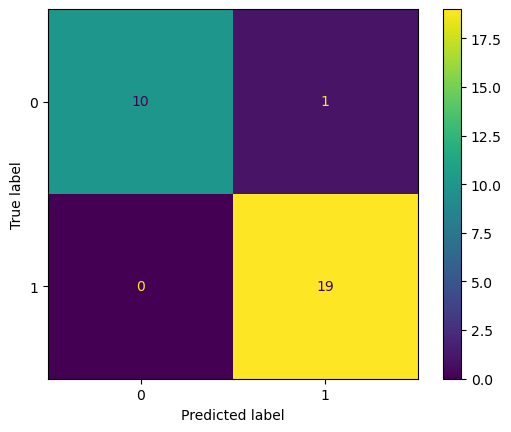

In [4]:
# Draw confusion matrix
y_pred = result.predict(X_test)
y_pred_binary = [1 if x > 0.5 else 0 for x in y_pred]
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Based on the provided confusion matrix, we can calculate the following metrics:
[[TP,FP],[FN,TN]]
1. Accuracy:
 - Accuracy = (true positive + true negative) / total number of samples
 - Accuracy = (10 + 19) / (10 + 1 + 0 + 19) = 96.67%

2. Sensitivity or Recall:
 - Sensitivity = true positive / (true positive + false negative )
 - Sensitivity = 19 / (19 + 1) = 19/20 = 95%

3. Specificity:
 - Specificity = true negative / (true negative + false positive)
 - Specificity = 0 / (0 + 10) = 0%

4. Error Rate:
 - Error rate = (false positive + false negative) / total number of samples
 - Error rate = (1 + 0) / (10 + 1 + 0 + 19) = 1/30 = 3.33%

### Analysis
- **High Accuracy:** An accuracy of 96.67% indicates that the model performs well overall in classifying sleep quality based on depression levels.
- **High Sensitivity:** A sensitivity of 95% shows that the model is very effective at correctly identifying individuals with poor sleep quality (true positives).
- **Moderate Specificity:** The specificity of 0% suggests that while the model is good at identifying true negatives, there is still a small number of false positives.
- **Low Error Rate:** An error rate of 3.33% indicates that the model makes relatively few mistaktives.

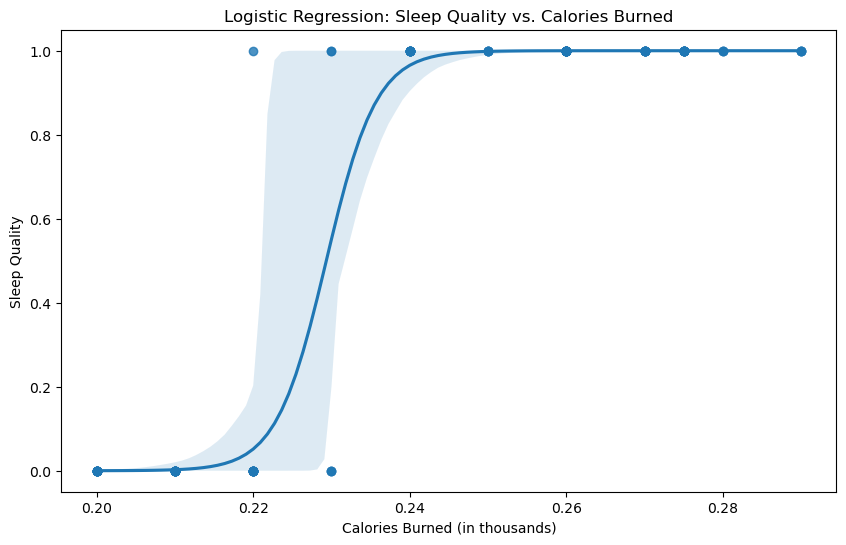

In [6]:
# Visualize logistic regression results
plt.figure(figsize=(10, 6))
sns.regplot(x='Calories Burned', y='Sleep Quality', data=data, logistic=True)
plt.title('Logistic Regression: Sleep Quality vs. Calories Burned')
plt.xlabel('Calories Burned (in thousands)')
plt.ylabel('Sleep Quality')
plt.show()

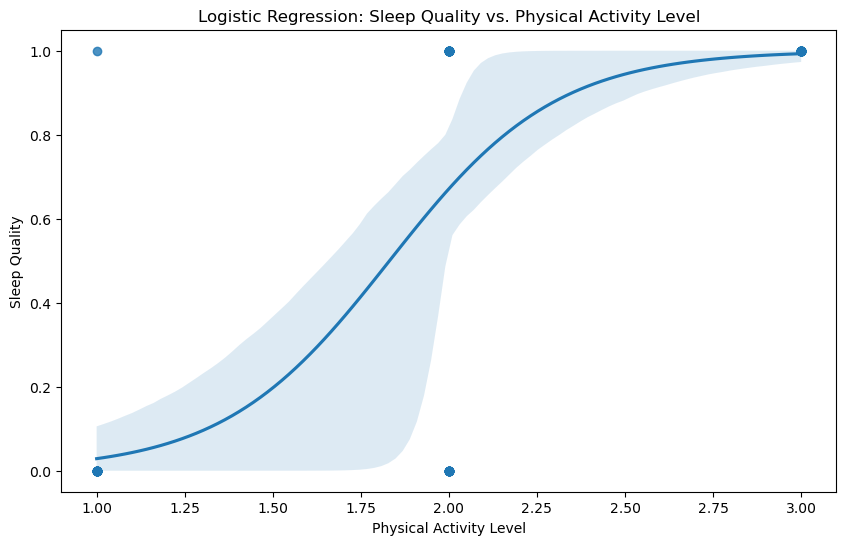

In [7]:
# Visualize logistic regression results
plt.figure(figsize=(10, 6))
sns.regplot(x='Physical Activity Level', y='Sleep Quality', data=data, logistic=True)
plt.title('Logistic Regression: Sleep Quality vs. Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Quality')
plt.show()

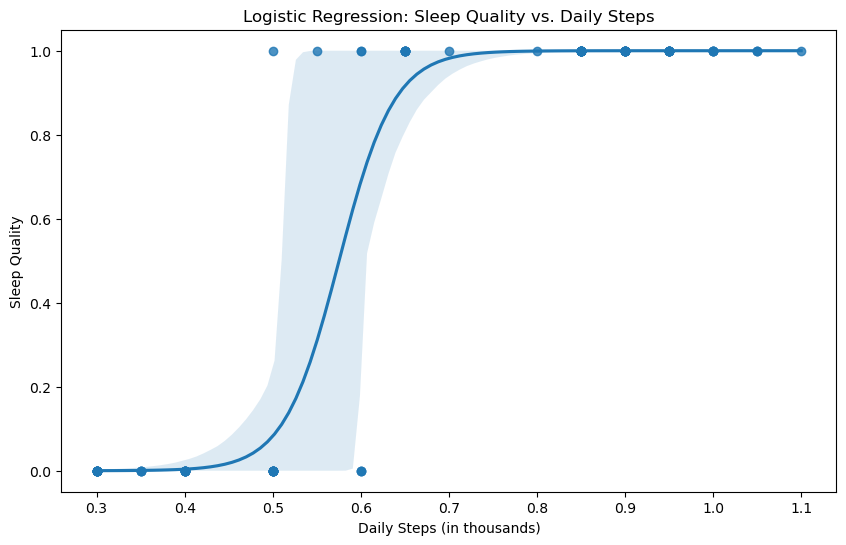

In [8]:
# Visualize logistic regression results
plt.figure(figsize=(10, 6))
sns.regplot(x='Daily Steps', y='Sleep Quality', data=data, logistic=True)
plt.title('Logistic Regression: Sleep Quality vs. Daily Steps')
plt.xlabel('Daily Steps (in thousands)')
plt.ylabel('Sleep Quality')
plt.show()

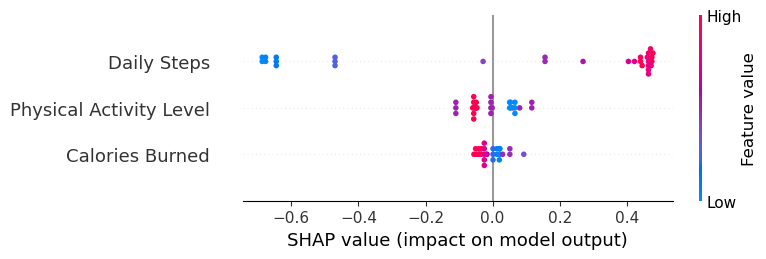

In [9]:
explainer = shap.Explainer(result.predict, X_train)  

shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)

shap_values_array = shap_values.values if hasattr(shap_values, 'values') else shap_values

# shap.dependence_plot("Calories Burned", shap_values_array, X_test, interaction_index="Physical Activity Level")

### Analysis
1. Calories Burned:
   - The SHAP value for Calories Burned ranges from around -0.6 to 0.4, indicating that higher calorie burn has a positive impact on the model's prediction of higher sleep quality.
   - The feature value distribution shows a wide range, with most values concentrated in the 0.20 to 0.28 range for Calories Burned.

2. Physical Activity Level:
   - The SHAP value for Physical Activity Level ranges from around -0.4 to 0.2, suggesting that higher physical activity levels have a positive influence on the model's prediction of sleep quality.
   - The feature value distribution shows a wider spread, with values ranging from low to high physical activity levels.

3. Daily Steps:
   - The SHAP value for Daily Steps ranges from around -0.2 to 0.4, indicating that more daily steps have a positive impact on the model's prediction of higher sleep quality.
   - The feature value distribution shows a wide range, with most values concentrated in the middle to higher range of daily steps.